In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import os

plt.style.use('seaborn')
sns.set(font_scale=2.5)
warnings.filterwarnings('ignore')

In [179]:
df_train = pd.read_csv('csv파일/train.csv')
df_test = pd.read_csv('csv파일/test.csv')

1. EDA

1-1. 결측치 확인

In [180]:
for col in df_train.columns :
    msg = 'column : {:>11}\t percent of NaN value : {:.1f}%'.format(col, df_train[col].isnull().sum()/len(df_train[col])*100)
    print(msg)

column : PassengerId	 percent of NaN value : 0.0%
column :    Survived	 percent of NaN value : 0.0%
column :      Pclass	 percent of NaN value : 0.0%
column :        Name	 percent of NaN value : 0.0%
column :         Sex	 percent of NaN value : 0.0%
column :         Age	 percent of NaN value : 19.9%
column :       SibSp	 percent of NaN value : 0.0%
column :       Parch	 percent of NaN value : 0.0%
column :      Ticket	 percent of NaN value : 0.0%
column :        Fare	 percent of NaN value : 0.0%
column :       Cabin	 percent of NaN value : 77.1%
column :    Embarked	 percent of NaN value : 0.2%


In [181]:
for col in df_test.columns :
    msg = 'column : {:>11}\t percent of NaN value : {:.1f}%'.format(col, df_train[col].isnull().sum()/len(df_train[col])*100)
    print(msg)

column : PassengerId	 percent of NaN value : 0.0%
column :      Pclass	 percent of NaN value : 0.0%
column :        Name	 percent of NaN value : 0.0%
column :         Sex	 percent of NaN value : 0.0%
column :         Age	 percent of NaN value : 19.9%
column :       SibSp	 percent of NaN value : 0.0%
column :       Parch	 percent of NaN value : 0.0%
column :      Ticket	 percent of NaN value : 0.0%
column :        Fare	 percent of NaN value : 0.0%
column :       Cabin	 percent of NaN value : 77.1%
column :    Embarked	 percent of NaN value : 0.2%


1-2. Survived data분석

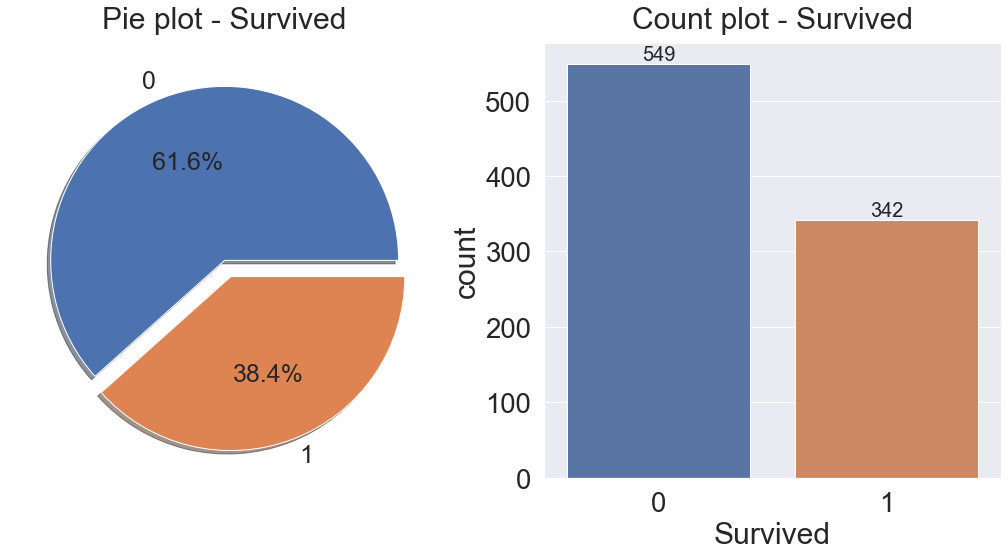

In [182]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0,0.1], autopct='%.1f%%', textprops={'size':25}, shadow=True)
ax[0].set_title('Pie plot - Survived', y=1.02)
ax[0].set_ylabel('')

sns.countplot(x='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived', y=1.02)

for p in ax[1].patches :
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2., height+5, height, ha='center', size=20)

1-3. Survived - Pclass

In [183]:
pd.crosstab(df_train['Survived'],df_train['Pclass'], margins=True).style.background_gradient(cmap='binary')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


Text(0.5, 1.02, 'Pclass : Survived vs Dead')

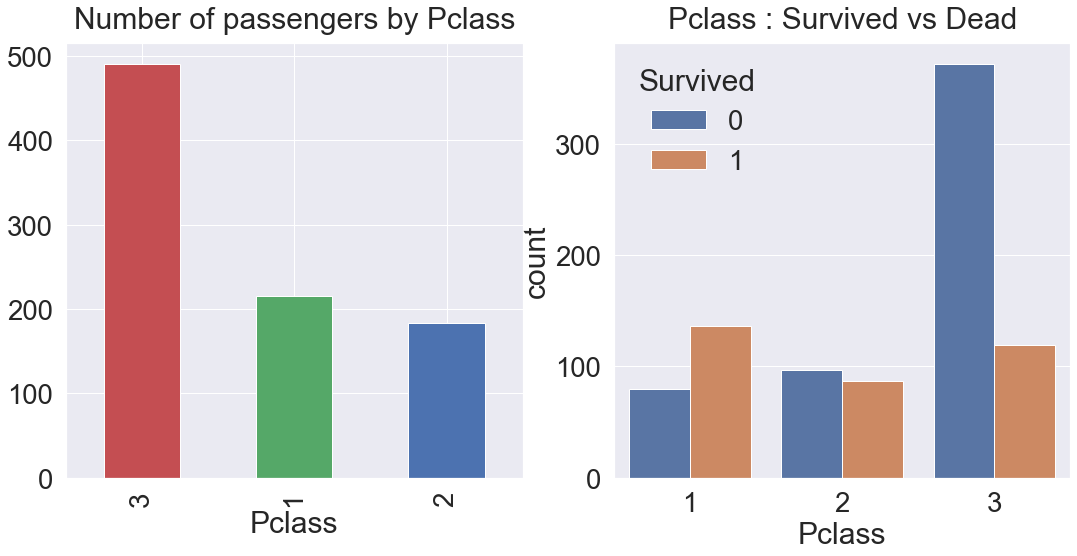

In [184]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0],color=['r','g','b'])
ax[0].set_title('Number of passengers by Pclass', y=1.02)
ax[0].set_xlabel('Pclass')

sns.countplot(data=df_train,x='Pclass',hue='Survived',ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=1.02)

1-4. Sex and Pclass

Text(0.5, 1.05, 'Factor plot : Survived-Pclass by Sex')

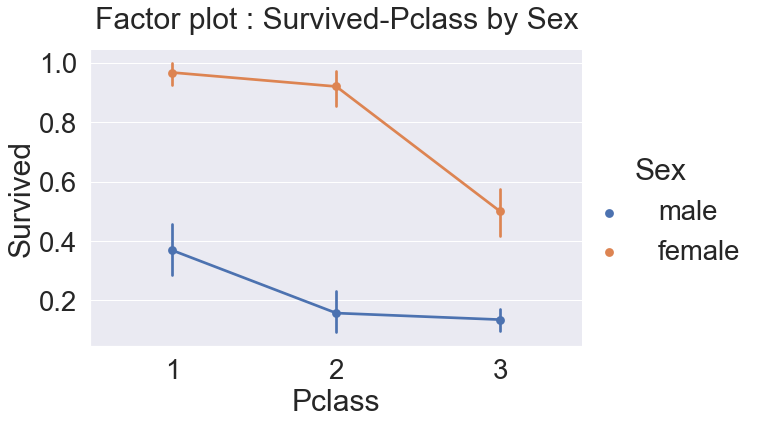

In [185]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=df_train, size=6, aspect=1.5)
plt.title('Factor plot : Survived-Pclass by Sex', y=1.05)

Text(0.5, 1.05, 'Pclass=1 : Age kde plot by Survived')

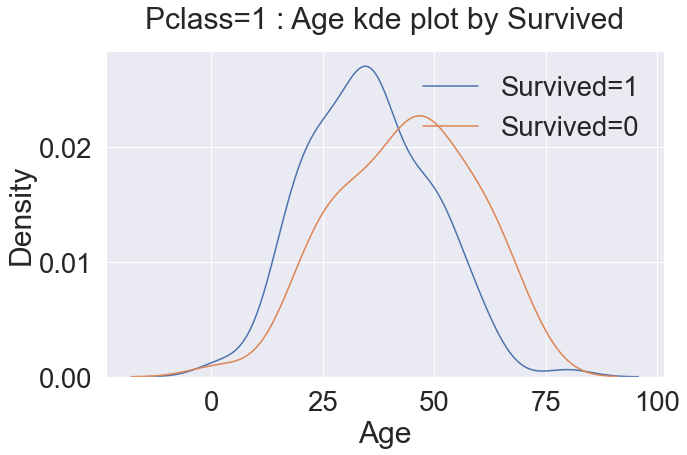

In [186]:
f, ax = plt.subplots(1,1,figsize=(10,6))
sns.kdeplot(df_train[(df_train['Pclass']==1) & (df_train['Survived']==1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Pclass']==1) & (df_train['Survived']==0)]['Age'], ax=ax)
plt.legend(['Survived=1','Survived=0'],loc='upper right')
plt.title('Pclass=1 : Age kde plot by Survived', y=1.05)

Text(0.5, 1.05, 'Pclass=2 : Age kde plot by Survived')

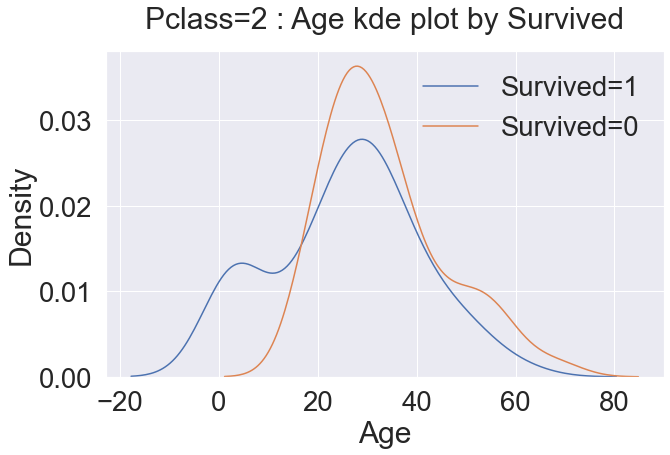

In [187]:
f, ax = plt.subplots(1,1,figsize=(10,6))
sns.kdeplot(df_train[(df_train['Pclass']==2) & (df_train['Survived']==1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Pclass']==2) & (df_train['Survived']==0)]['Age'], ax=ax)
plt.legend(['Survived=1','Survived=0'],loc='upper right')
plt.title('Pclass=2 : Age kde plot by Survived', y=1.05)

Text(0.5, 1.05, 'Pclass=3 : Age kde plot by Survived')

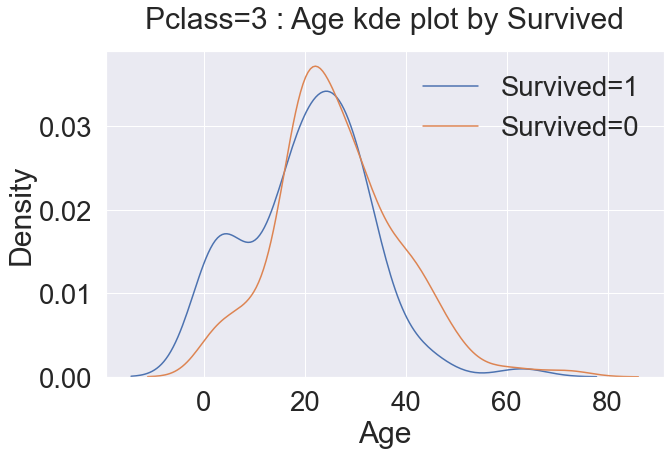

In [188]:
f, ax = plt.subplots(1,1,figsize=(10,6))
sns.kdeplot(df_train[(df_train['Pclass']==3) & (df_train['Survived']==1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Pclass']==3) & (df_train['Survived']==0)]['Age'], ax=ax)
plt.legend(['Survived=1','Survived=0'],loc='upper right')
plt.title('Pclass=3 : Age kde plot by Survived', y=1.05)

연령에 따른 생존확률

Text(0.5, 0, 'Age : 1~x')

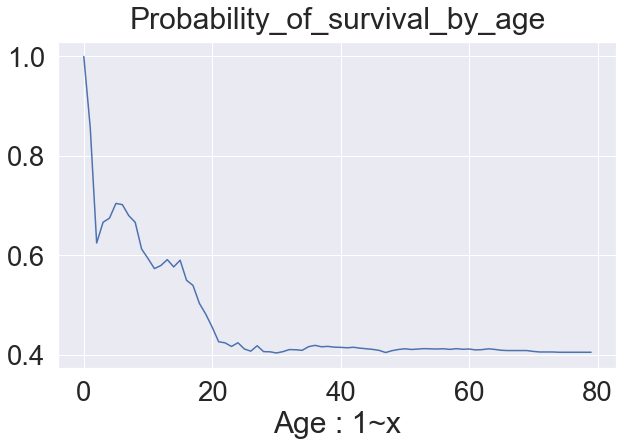

In [189]:
probability_of_survival_by_age = []

for age in range(1,81) :
    probability_of_survival_by_age.append(df_train[df_train['Age']<age]['Survived'].mean())

plt.figure(figsize=(10,6))
plt.plot(probability_of_survival_by_age)
plt.title('Probability_of_survival_by_age', y=1.02)
plt.xlabel('Age : 1~x')

1-5. Pclass, Sex, Age

Text(0.5, 1.03, 'Violin plot : Age-Sex')

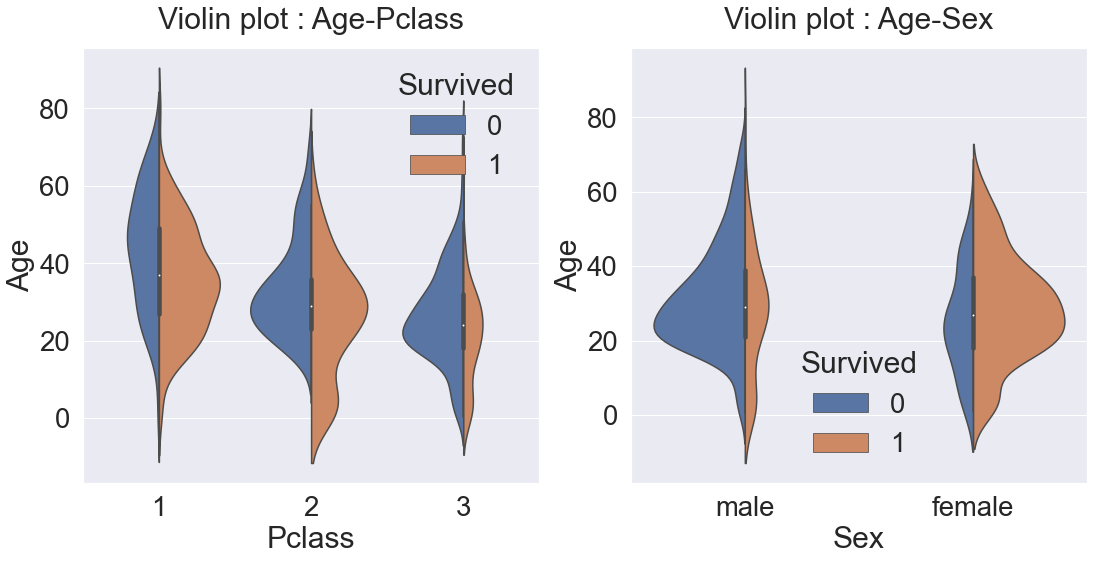

In [190]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x='Pclass',y='Age',data=df_train, hue='Survived', ax=ax[0], scale='count', split=True)
ax[0].set_title('Violin plot : Age-Pclass', y=1.03)

sns.violinplot(x='Sex', y='Age', data=df_train, scale='count',hue='Survived' ,split=True, ax=ax[1])
ax[1].set_title('Violin plot : Age-Sex', y=1.03)

1-6. Embarked

<AxesSubplot:xlabel='Embarked'>

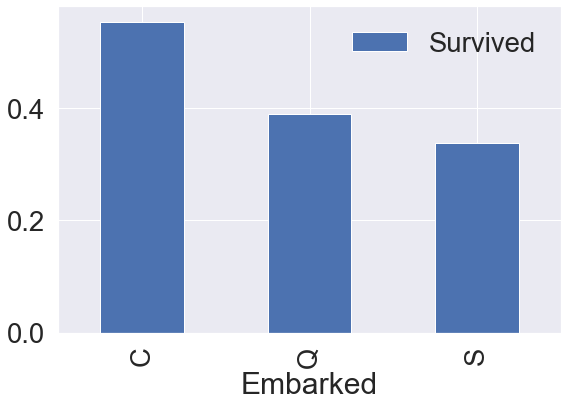

In [191]:
df_train[['Survived','Embarked']].groupby(['Embarked'],as_index=True).mean().plot.bar(figsize=(9,6))

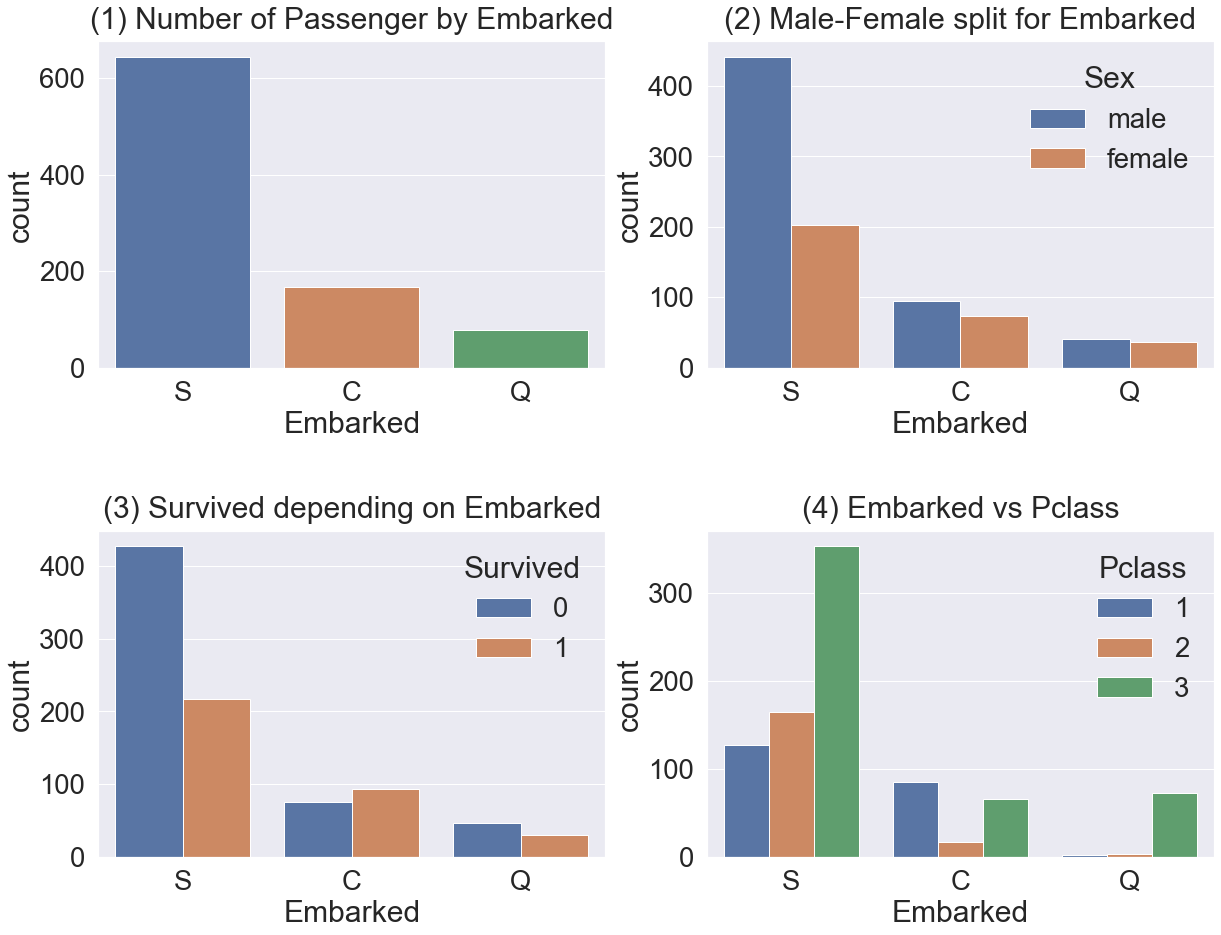

In [192]:
f, ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) Number of Passenger by Embarked',y=1.02)

sns.countplot('Embarked',data=df_train,hue='Sex',ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for Embarked',y=1.02)

sns.countplot('Embarked',data=df_train,hue='Survived',ax=ax[1,0])
ax[1,0].set_title('(3) Survived depending on Embarked',y=1.02)

sns.countplot('Embarked',data=df_train,hue='Pclass',ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass',y=1.02)


plt.subplots_adjust(wspace=0.2,hspace=0.5)

1-7. Family

In [193]:
df_train['Familysize'] = df_train['SibSp'] + df_train['Parch'] + 1

Text(0.5, 1.02, '(3) Survived rate depending on FamilySize')

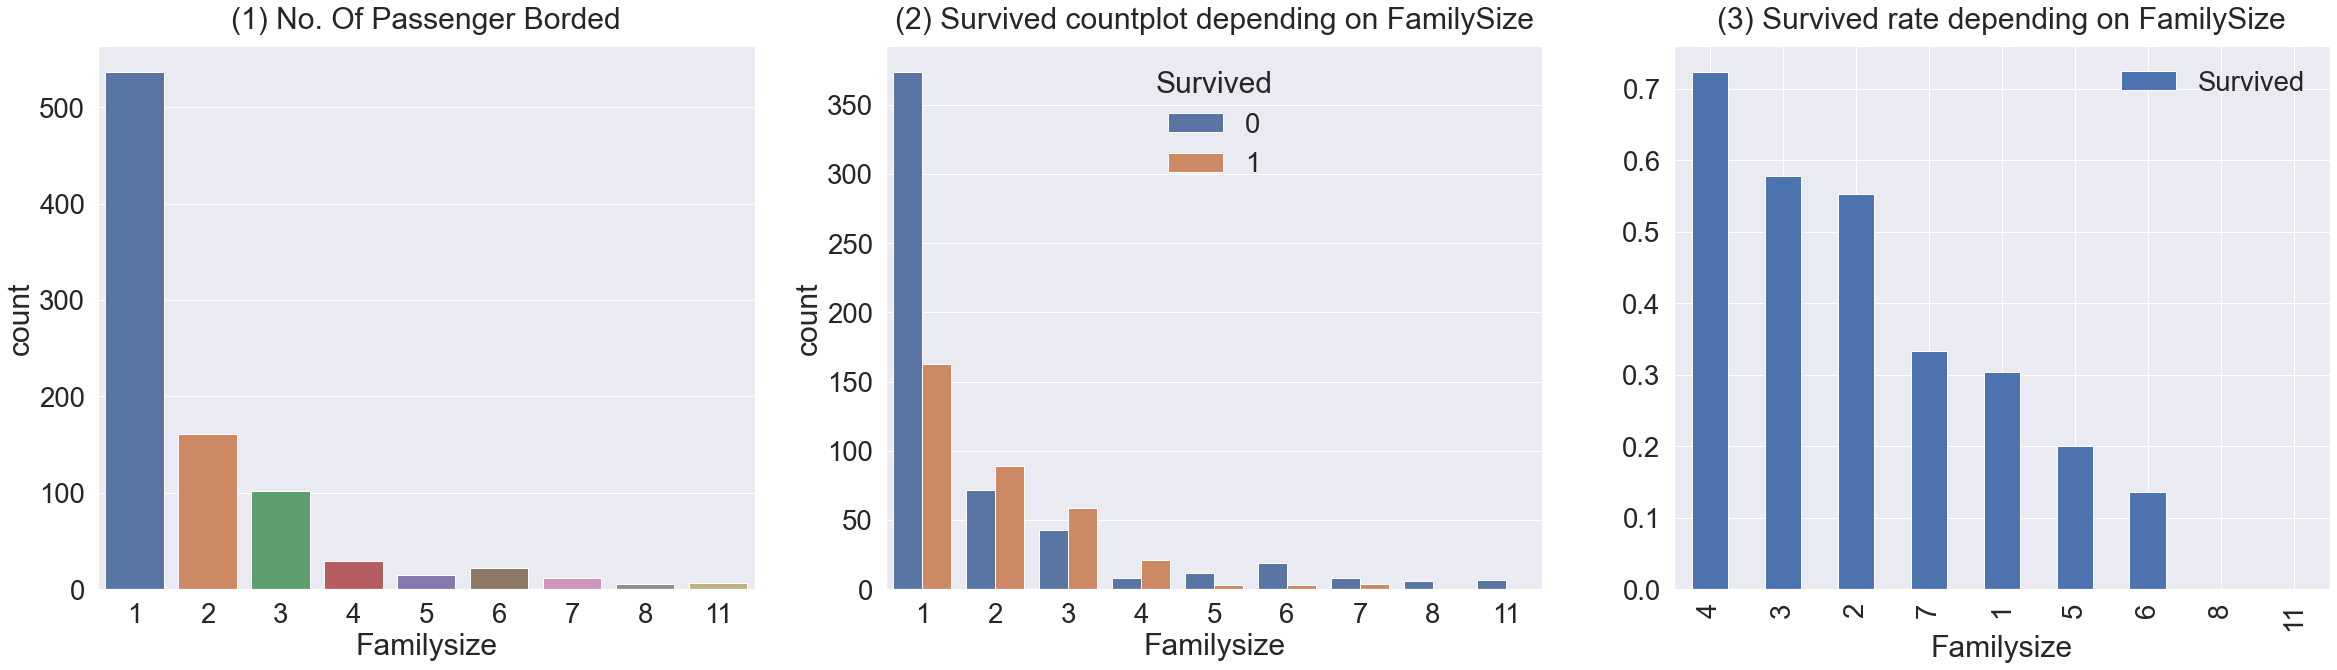

In [194]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('Familysize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Borded', y=1.02)

sns.countplot('Familysize',hue='Survived' ,data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['Familysize','Survived']].groupby('Familysize',as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

1-8. Fare

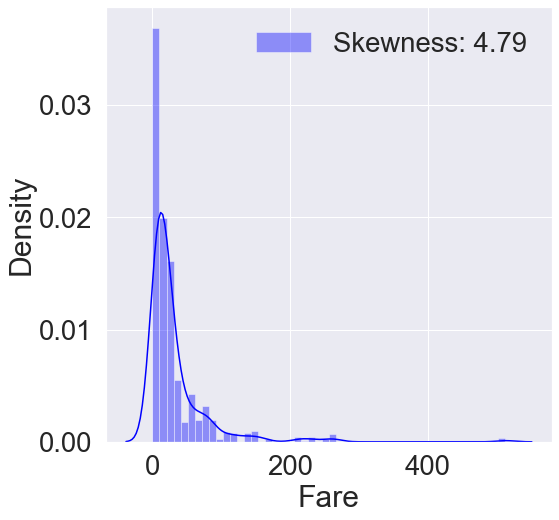

In [195]:
f, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='blue',label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax) 
# skew : 왜도(평균을 중심으로 치우친 정도) 0에 가까울 수록 대칭형 (양수면 좌로 치우침, 음수면 우로 치우침)
g = g.legend(loc='best')

In [196]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)

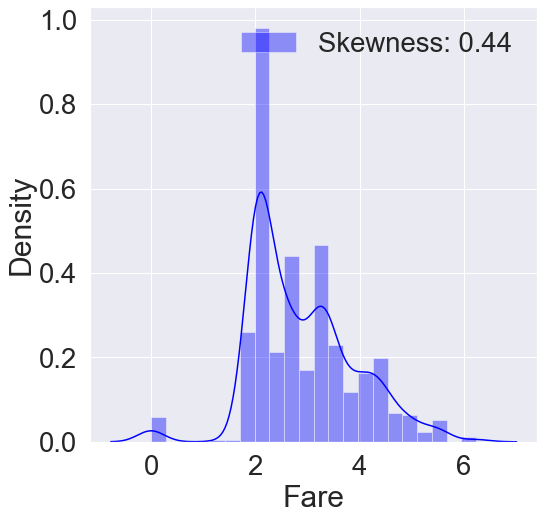

In [197]:
f, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='blue',label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax) 
# skew : 왜도(평균을 중심으로 치우친 정도) 0에 가까울 수록 대칭형 (양수면 좌로 치우침, 음수면 우로 치우침)
g = g.legend(loc='best')

2. Feature engineering

1) NaN 채우기(Age)

In [198]:
df_train['initial'] = df_train['Name'].str.extract('([A-Za-z]*)\.')
df_test['initial'] = df_test['Name'].str.extract('([A-Za-z]*)\.')

In [199]:
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [200]:
df_train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

df_test['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)                            

<AxesSubplot:xlabel='initial'>

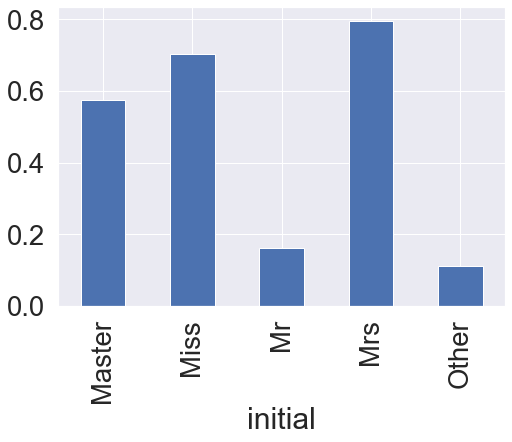

In [201]:
df_train.groupby('initial')['Survived'].mean().plot.bar()

In [202]:
df_all = pd.concat([df_train,df_train],axis=0)

In [203]:
df_all.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familysize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [204]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Mr'),['Age']] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Mrs'),['Age']] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Other'),['Age']] = 45
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Master'),['Age']] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Miss'),['Age']] = 22

In [205]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Mr'),['Age']] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Mrs'),['Age']] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Other'),['Age']] = 45
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Master'),['Age']] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Miss'),['Age']] = 22

2) Embarked NaN

In [206]:
df_train['Embarked'].isnull().sum()

2

In [207]:
df_train['Embarked'].fillna('S', inplace=True) #S가 가장 많아서 2개정도는 s로 채움

3. Age 범주화작업

In [208]:
df_train['Age_cat'] = 0

In [209]:
def category_age(x) :
    if x < 10 :
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 :
        return 4
    elif x < 60 :
        return 5
    elif x < 70 :
        return 6
    else :
        return 7

In [210]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)

In [211]:
df_train.drop('Age',axis=1, inplace=True)

3. 문자데이터 숫자로 바꾸기

In [212]:
df_train.initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [213]:
df_train['initial'] = df_train['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['initial'] = df_test['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [214]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [215]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [216]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

4. 피어슨 상관계수

In [217]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','Familysize','initial','Age_cat']]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

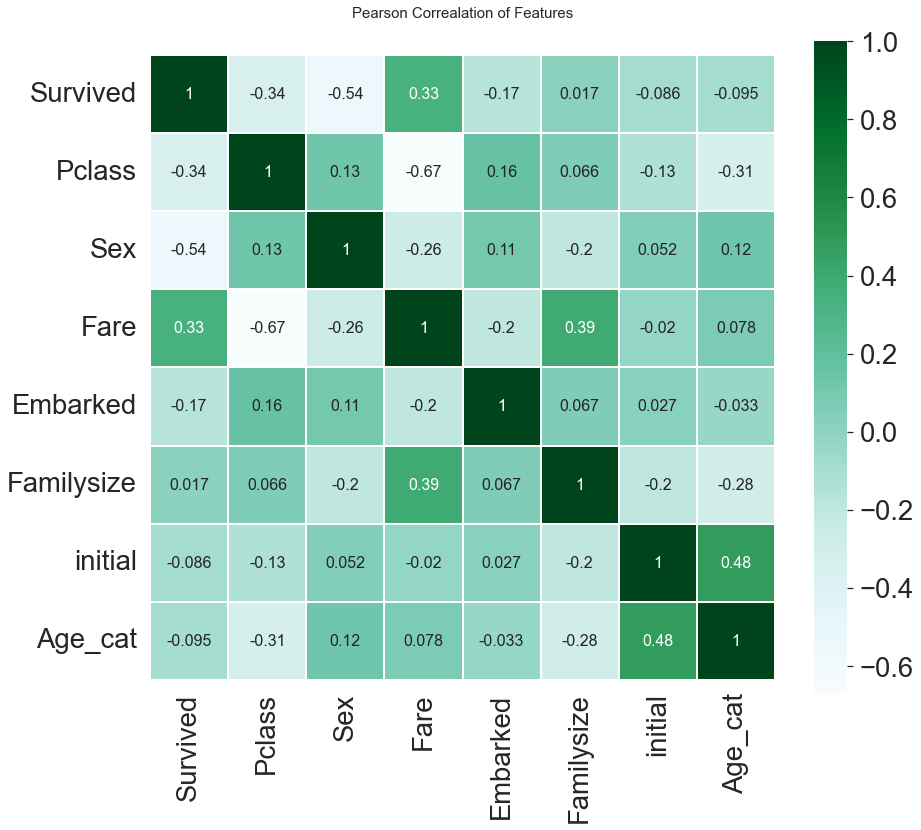

In [218]:
colormap = plt.cm.BuGn
plt.figure(figsize=(14,12))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white',
            annot=True ,annot_kws={'size':16})